# Isophotes
Isophotes are a nice visual way to show the shape of the coma and tail. Because they are not used for science, just one stacked image from one of the days is sufficient. However, it is worthwhile developing a routine to do it automatically for any image, should the need arise.

In [24]:
# Importing packages
import cometToolkit as ctk
import matplotlib.pyplot as plt
import numpy as np

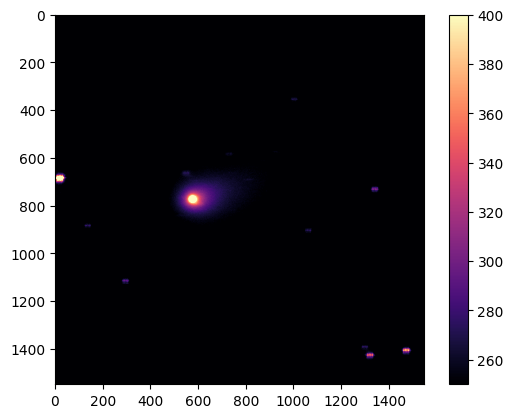

In [22]:
# Loading R image from the first day
image = ctk.GetImage("../DataProducts/StackedImages/Day12/rStacked.fits")
plt.imshow(image, vmin=250, vmax=400, cmap="magma")
plt.colorbar()

(array([772, 772, 772, 773, 773, 773, 773, 773, 774, 774, 774, 774, 774,
       774, 775, 775, 775, 775, 775, 776, 776, 776, 776]), array([573, 574, 575, 572, 573, 574, 575, 576, 572, 573, 574, 575, 576,
       577, 572, 573, 574, 576, 577, 573, 574, 575, 576]))


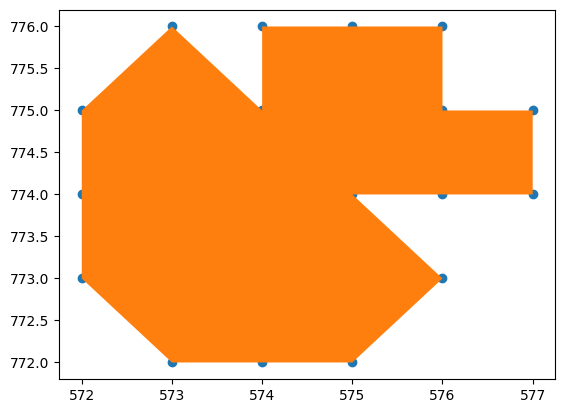

In [54]:
stepSize =  1000

upperThreshold = np.max(image)
lowerThreshold = np.max(image) - stepSize

if lowerThreshold < np.min(image):
    lowerThreshold = np.min(image)

thresholdIndices = np.where((image > lowerThreshold)  & (image < upperThreshold))

print(thresholdIndices)
plt.scatter(thresholdIndices[1], thresholdIndices[0])

points = []
for x, y in zip(thresholdIndices[1], thresholdIndices[0]):
    points.append((x,y))

edgePoints = []
for point in points:
    directions = [(0,1), (1,0), (0,-1), (-1, 0)]

    for direction in directions:
        testPoint = (point[0] + direction[0], point[1] + direction[1])

        # Check if point is on edge
        if testPoint not in points:
            edgePoints.append(point)
            break

from scipy.spatial import ConvexHull
edgePoints = np.array(edgePoints)

#hull = ConvexHull(points)

order = np.argsort(np.arctan2(edgePoints[:,1] - edgePoints[:,1].mean(), edgePoints[:,0] - edgePoints[:,0].mean()))

#plt.scatter(edgePoints[:,0], edgePoints[:,1])
#plt.fill(edgePoints[:,0], edgePoints[:,1])
#plt.fill(edgePoints[hull.vertices, 0], edgePoints[hull.vertices, 1])
plt.fill(edgePoints[:,0][order], edgePoints[:,1][order])